<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

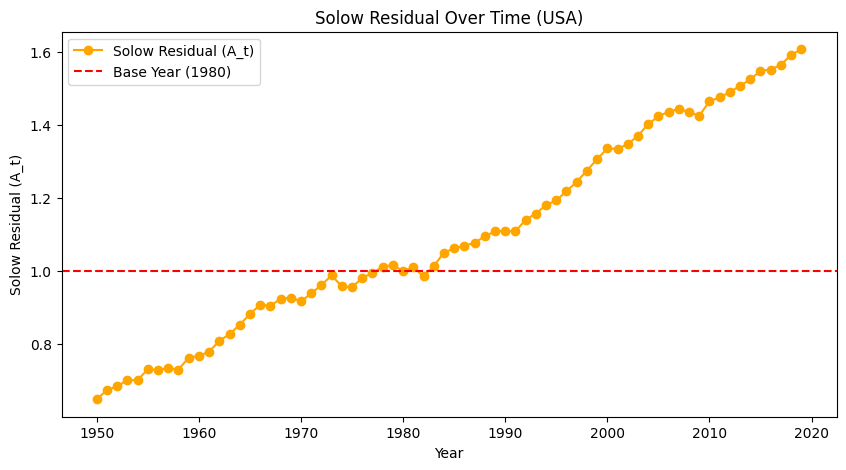

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file (adjust file path as necessary)
file_path = "C:/Users/Jonbf5/OneDrive - University of Cincinnati/Classes/ECON8030 Macro Theory/Group Projects/Project 2 - Solow Model/Penn Data Proj 2.xlsx"

# Load the 4th sheet (index 3, since Python uses zero-based indexing)
sheet_name = 3
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Select the relevant columns
df_filtered = df[['countrycode', 'year', 'rgdpo', 'rnna', 'rtfpna', 'labsh', 'emp']]

# Filter for the selected country 
country_code = "USA"
df_country = df_filtered[df_filtered['countrycode'] == country_code].copy()

# Drop rows with missing values in key columns
df_country.dropna(subset=['rgdpo', 'rnna', 'emp'], inplace=True)

# Compute log values
df_country['log_Y'] = np.log(df_country['rgdpo'])
df_country['log_K'] = np.log(df_country['rnna'])
df_country['log_L'] = np.log(df_country['emp'])

# Compute log(A_t) using the Solow residual formula
alpha = 0.3
df_country['log_A'] = df_country['log_Y'] - (alpha * df_country['log_K']) - ((1 - alpha) * df_country['log_L'])

# Normalize A_t to 1 in the base year (1980)
base_year = 1980
A_base = df_country[df_country['year'] == base_year]['log_A'].values[0]
df_country['A_t'] = np.exp(df_country['log_A'] - A_base)  # Convert back from log scale

# Plot A_t over time
plt.figure(figsize=(10, 5))
plt.plot(df_country['year'], df_country['A_t'], marker='o', linestyle='-', label="Solow Residual (A_t)", color="orange")
plt.axhline(y=1, color='r', linestyle='--', label="Base Year (1980)")
plt.xlabel("Year")
plt.ylabel("Solow Residual (A_t)")
plt.title("Solow Residual Over Time (USA)")
plt.legend()
plt.grid
